# 6.4 Supervised Maschine Learning

## This script contains the following:
### 1. Importing libraries and data
### 2. Check data
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Assessment

## 1. Importing libraries and data

In [2]:
# Importing libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook

%matplotlib inline

In [4]:
# Assign path variable
path = '/Users/mariamaske/World Happiness Data!/02 Data/Prepared Data'

In [5]:
# loading dataframe
# Join path Happiness_data_complete.csv
df = pd.read_csv(os.path.join(path,'Happiness_data_after_exploring.csv'), index_col = False)

### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'Region', 'Happiness Score',
       'Logged GDP per capita', 'Healthy life expectancy',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Year', 'Happiness Rank', 'Happiness Score category', 'Year_loc'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0.1,Unnamed: 0,Country,Region,Happiness Score,Logged GDP per capita,Healthy life expectancy,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Year,Happiness Rank,Happiness Score category,Year_loc
0,0,152,Afghanistan,South Asia,3.5750,7.556315,49.680115,0.319821,0.302853,0.303354,0.234138,0.365104,0.097188,2015,153,Low Happiness Score,Vor Corona
1,1,304,Afghanistan,South Asia,3.3600,7.497288,49.871265,0.382266,0.110368,0.173436,0.164305,0.312680,0.071116,2016,149,Low Happiness Score,Vor Corona
2,2,442,Afghanistan,South Asia,3.7940,7.497288,49.871265,0.401000,0.582000,0.181000,0.106000,0.312000,0.061000,2017,137,Low Happiness Score,Vor Corona
3,3,591,Afghanistan,South Asia,3.6320,7.460144,52.339527,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,2018,145,Low Happiness Score,Vor Corona
4,4,747,Afghanistan,South Asia,3.2030,7.494588,52.599998,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000,2019,147,Low Happiness Score,Vor Corona
5,5,901,Afghanistan,South Asia,2.5669,7.462861,52.590000,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,2020,153,Low Happiness Score,Corona
6,6,1050,Afghanistan,South Asia,2.5230,7.695000,52.493000,0.370000,0.000000,0.126000,0.000000,0.122000,0.010000,2021,149,Low Happiness Score,Corona
7,7,1168,Afghanistan,South Asia,2.4040,NaN,NaN,0.758000,0.000000,0.289000,0.000000,0.089000,0.005000,2022,146,Low Happiness Score,Corona
8,8,1296,Afghanistan,South Asia,1.8590,7.324000,54.712000,0.645000,0.000000,0.087000,0.000000,0.093000,0.059000,2023,137,Low Happiness Score,Corona
9,9,94,Albania,Central and Eastern Europe,4.9590,9.269685,68.105164,0.878675,0.804339,0.813254,0.357326,0.142725,0.064127,2015,95,Middle Happiness Score,Vor Corona


In [8]:
#Dropping Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1' ])

In [9]:
df.shape

(1297, 15)

##### Missing values

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Country                                         0
Region                                          0
Happiness Score                                 0
Logged GDP per capita                         198
Healthy life expectancy                       178
Explained by: Log GDP per capita                0
Explained by: Social support                    0
Explained by: Healthy life expectancy           0
Explained by: Freedom to make life choices      0
Explained by: Generosity                        0
Explained by: Perceptions of corruption         0
Year                                            0
Happiness Rank                                  0
Happiness Score category                        0
Year_loc                                        0
dtype: int64

##### Duplicates check

In [11]:
dups = df.duplicated()

In [12]:
dups.shape # No dups

(1297,)

##### Extreme values checks

/var/folders/q1/d0sf9cv50yb2q64wy681zzzh0000gn/T/ipykernel_4428/2563298610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Explained by: Healthy life expectancy'], bins=25) # Shows extreme values


<Axes: xlabel='Explained by: Healthy life expectancy', ylabel='Density'>

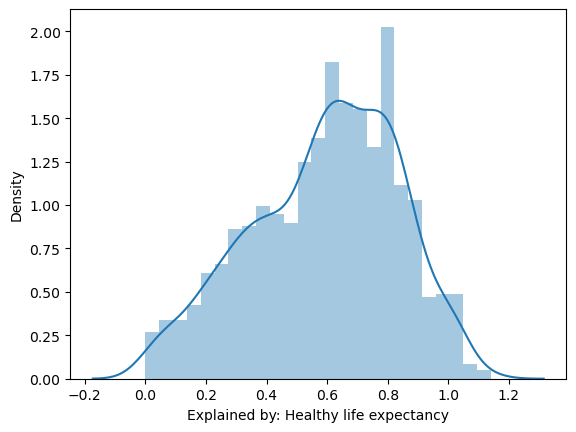

In [28]:
sns.distplot(df['Explained by: Healthy life expectancy'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [30]:
df['Explained by: Healthy life expectancy'].mean() # Check the mean

0.5922081762412095

In [31]:
df['Explained by: Healthy life expectancy'].median() # Check the median

0.618

In [32]:
df['Explained by: Healthy life expectancy'].max() # Check the max

1.141

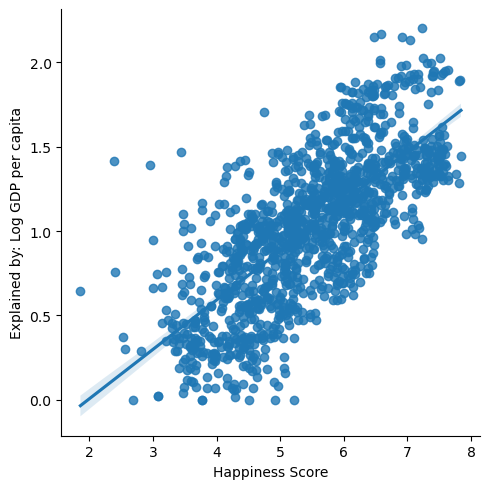

In [71]:
# Since in the task 6.2. the highest correlation had the factors Economy (GDP per Capita) & Happiness Score I am going to look into this relationship.
#creates a scatterplot for the Happiness Score and Economy (GDP per Capita) columns in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Explained by: Log GDP per capita', data = df)

#### Hypothesis: The higher the value for logged GDP per capity, the higher the happiness score.

### 3. Data prep for regression analysis 

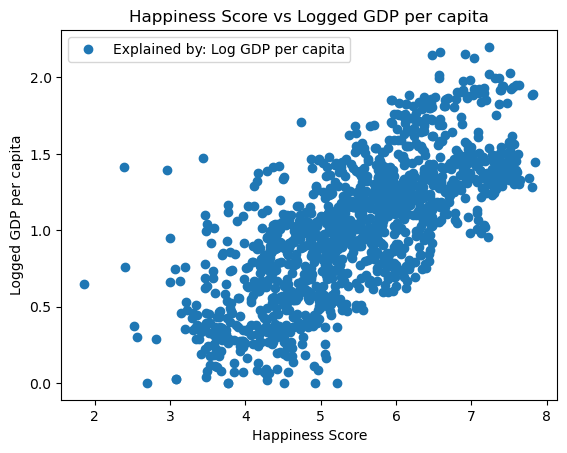

In [72]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness Score', y = 'Explained by: Log GDP per capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness Score vs Logged GDP per capita')  
plt.xlabel('Happiness Score')  
plt.ylabel('Logged GDP per capita')  
plt.show()

In [73]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Happiness Score'].values.reshape(-1,1)
y = df['Explained by: Log GDP per capita'].values.reshape(-1,1)

In [74]:
X

array([[3.57500005],
       [3.36      ],
       [3.794     ],
       ...,
       [3.145     ],
       [2.995     ],
       [3.204     ]])

In [75]:
y

array([[0.31982085],
       [0.38226566],
       [0.401     ],
       ...,
       [0.457     ],
       [0.947     ],
       [0.758     ]])

In [76]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [77]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [78]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [79]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

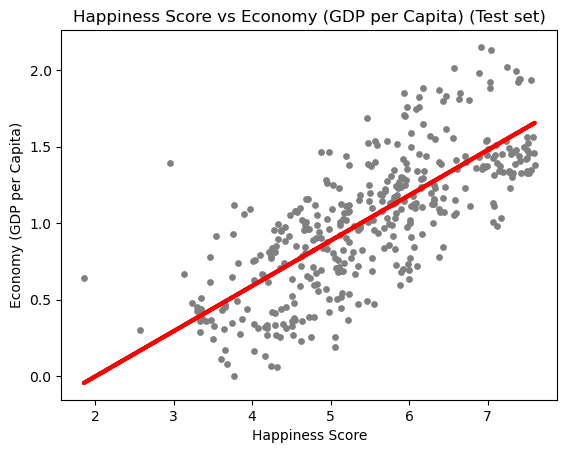

In [80]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita) (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy (GDP per Capita)')
plot_test.show()

In [81]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [82]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29610388]]
Mean squared error:  0.0882444910632971
R2 score:  0.5472482083807684


In [83]:
y_predicted

array([[ 0.77548117],
       [ 1.20808894],
       [ 1.27796946],
       [ 1.23100743],
       [ 0.48500327],
       [ 0.9759435 ],
       [ 0.64637988],
       [ 0.94337205],
       [ 1.20572011],
       [ 0.5714656 ],
       [ 1.1361357 ],
       [ 1.23148115],
       [ 1.02480064],
       [ 1.26020323],
       [ 0.74379809],
       [ 1.18351226],
       [ 0.93241623],
       [ 1.59805775],
       [ 1.03457207],
       [ 0.71004222],
       [ 0.93419285],
       [ 1.5329149 ],
       [ 0.92560584],
       [ 1.46084321],
       [ 0.16606978],
       [ 0.58271755],
       [ 1.07276947],
       [ 1.15094089],
       [ 0.78957566],
       [ 1.62500321],
       [ 1.3525876 ],
       [ 1.04878501],
       [ 0.88178247],
       [ 1.09053574],
       [ 1.12073826],
       [ 1.601611  ],
       [ 0.74054091],
       [ 0.47878508],
       [ 1.07839544],
       [ 0.9081357 ],
       [ 1.13761623],
       [ 1.27145517],
       [ 1.55926815],
       [ 1.17877466],
       [ 0.91459077],
       [ 1

In [84]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.228000,0.775481
1,1.748000,1.208089
2,1.161000,1.277969
3,0.932204,1.231007
4,0.306000,0.485003
5,0.982000,0.975944
6,0.332000,0.646380
7,0.901977,0.943372
8,1.101000,1.205720
9,0.438000,0.571466


##### Compare how the regression fits the training set

In [85]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [86]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [87]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.29610388]]
Mean squared error:  0.09326229352879187
R2 score:  0.5263953564752868


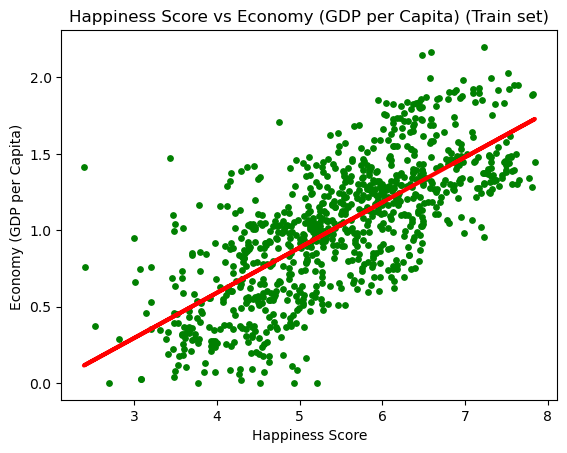

In [88]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness Score vs Economy (GDP per Capita) (Train set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Economy (GDP per Capita) ')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [89]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Explained by: Log GDP per capita'] >= 0.2] 

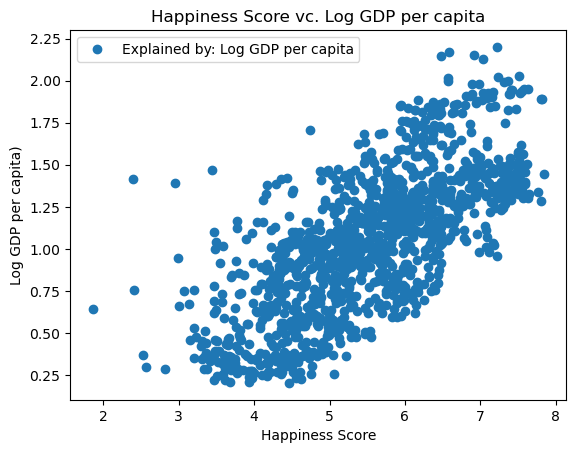

In [91]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Happiness Score', y='Explained by: Log GDP per capita', style='o')  
plt.title('Happiness Score vc. Log GDP per capita')  
plt.xlabel('Happiness Score')  
plt.ylabel('Log GDP per capita)')  
plt.show()

In [92]:
# Reshape again.

X_2 = df_test['Happiness Score'].values.reshape(-1,1)
y_2 = df_test['Explained by: Log GDP per capita'].values.reshape(-1,1)

In [93]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [94]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [95]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [96]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [97]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27324516]]
Mean squared error:  0.08245203011971826
R2 score:  0.5327668559824423


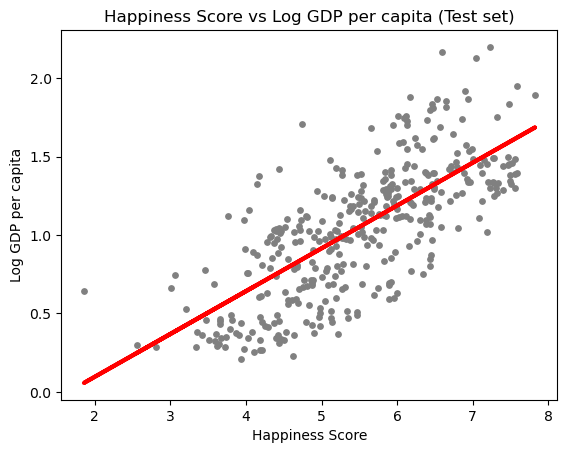

In [98]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Happiness Score vs Log GDP per capita (Test set)')
plot_test.xlabel('Happiness Score')
plot_test.ylabel('Log GDP per capita')
plot_test.show()

In [99]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0.300706,0.250216
1,1.030000,0.838814
2,1.340000,1.535862
3,0.330239,0.780339
4,0.564000,0.831709
5,0.939290,1.080362
6,0.885000,0.756294
7,1.446887,1.487142
8,1.421000,1.376833
9,1.285000,1.138837


## 5. Assessment:

We can see that there is a slight moderate positive correlation between the Explained by: Log GDP per capita and the Happiness score. 

However, this is not sufficient to determine the Happiness Score exactly. The actual values still differ too much from the predicted values. This leads us to the conclusion that our model is not accurate enough. The relationship simply does not follow a single, straight regression line.
Therefore, we also have to partially abandon our hypothesis, because although there is a slight positive relationship, the variance cannot be explained by the linear relationship. 

Furthermore, this problem persists even after the larger outliners were removed in the test. 
In this particular case, it may even be better to leave the outliners in, as this would avoid artificially confirming that social support has a large impact on the happiness score, even though there is not only one but several outliners that indicate a slightly different result. This would also be a case of bias. 
